<a href="https://colab.research.google.com/github/Vargol/StableDiffusionColabs/blob/main/PixArt/PixArt_Sigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install git+https://github.com/huggingface/diffusers accelerate transformers mediapy

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-xg7gigzb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-xg7gigzb
  Resolved https://github.com/huggingface/diffusers to commit cf6e0407e051467b480830d3ed97d2873b5019d3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.

In [ ]:
! git clone https://github.com/PixArt-alpha/PixArt-sigma.git

Cloning into 'PixArt-sigma'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 235 (delta 100), reused 203 (delta 71), pack-reused 0
Receiving objects: 100% (235/235), 454.19 KiB | 4.45 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [ ]:
import sys
import random

sys.path.insert(0,'/content/PixArt-sigma')

import torch
#from diffusers import Transformer2DModel
#from scripts.diffusers_patches import pixart_sigma_init_patched_inputs, PixArtSigmaPipeline

#assert getattr(Transformer2DModel, '_init_patched_inputs', False), "Need to Upgrade diffusers: pip install git+https://github.com/huggingface/diffusers"
#setattr(Transformer2DModel, '_init_patched_inputs', pixart_sigma_init_patched_inputs)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weight_dtype = torch.float16

pipe = PixArtSigmaPipeline.from_pretrained(
    "Vargol/PixArt-Sigma_16bit",
    torch_dtype=weight_dtype,
    variant='fp16',
    use_safetensors=True,
)
pipe.to(device)

# Enable memory optimizations.
# pipe.enable_model_cpu_offload()



Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


PixArtSigmaPipeline {
  "_class_name": "PixArtSigmaPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "Vargol/PixArt-Sigma_16bit",
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "T5Tokenizer"
  ],
  "transformer": [
    "diffusers",
    "Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
! pip install mediapy
import mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00



Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


  0%|          | 0/20 [00:00<?, ?it/s]

""

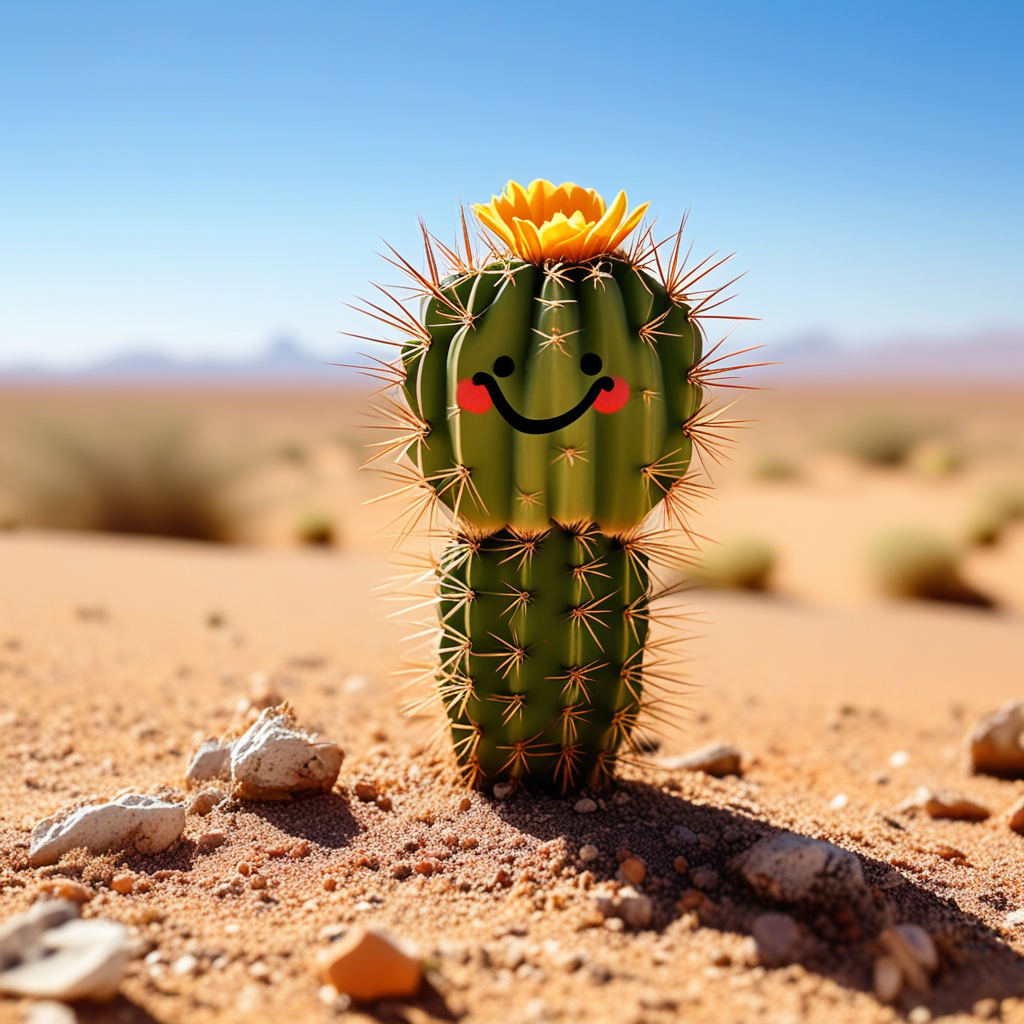

In [ ]:
prompt = "A small cactus with a happy face in the Sahara desert."
image = pipe(prompt).images[0]
mediapy.show_image(image)
